<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Digital-phase-lead-and-deadbeat-controller" data-toc-modified-id="Digital-phase-lead-and-deadbeat-controller-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Digital phase-lead and deadbeat controller</a></span></li><li><span><a href="#Pre-requisites" data-toc-modified-id="Pre-requisites-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pre-requisites</a></span></li><li><span><a href="#Source-code" data-toc-modified-id="Source-code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Source code</a></span></li><li><span><a href="#Digital-phase-lead-controller" data-toc-modified-id="Digital-phase-lead-controller-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Digital phase-lead controller</a></span><ul class="toc-item"><li><span><a href="#Matlab-script:-closed-loop-step-response-and-Bode-diagram" data-toc-modified-id="Matlab-script:-closed-loop-step-response-and-Bode-diagram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Matlab script: closed-loop step response and Bode diagram</a></span></li><li><span><a href="#Phase-Lead-compensator" data-toc-modified-id="Phase-Lead-compensator-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Phase-Lead compensator</a></span><ul class="toc-item"><li><span><a href="#Step-1" data-toc-modified-id="Step-1-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Step 1</a></span></li><li><span><a href="#Step-2" data-toc-modified-id="Step-2-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Step 2</a></span></li><li><span><a href="#Step-3" data-toc-modified-id="Step-3-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Step 3</a></span></li><li><span><a href="#Step-4" data-toc-modified-id="Step-4-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Step 4</a></span></li><li><span><a href="#Step-5" data-toc-modified-id="Step-5-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Step 5</a></span></li></ul></li></ul></li><li><span><a href="#Deadbet-controller" data-toc-modified-id="Deadbet-controller-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Deadbet controller</a></span></li></ul></div>

# Digital phase-lead and deadbeat controller

The first part is the design of a phase-lead digital controller with small steady state error, small settling time, minimum input action, and minimum overshoot. The second part is a deadbeat controller that reaches zero error very fast at sampling instants in discrete domain systems.


# Pre-requisites

- Digital Control Systems theory.
- Bode and root-locus analysis theory
- Jupyter Notebook with Matlab-kernel.
- Matlab.

# Source code

Version [PDF](https://raw.githubusercontent.com/paulomarconi/Phase-lead_deadbeat/master/week5/week5.pdf)/[HTML](../../files/Phase-lead_deadbeat/Phase-lead_deadbeat.html). Matlab and LaTex source code on [GitHub](https://github.com/paulomarconi/Phase-lead_deadbeat). 




# Digital phase-lead controller
The aim of this task is to design a digital controlled system with some requirements, small steady state error, small settling time, minimum input action, and minimum overshoot. 

The plant to be studied is,
\begin{align}
G_p(s) &= \dfrac{0.04(s+1)}{s^2+0.2s+0.04} \tag{1}
\end{align}
and the digital controller should have the form,
\begin{align}
D(z) &= K\dfrac{z-A}{z-B} \tag{2}
\end{align}



## Matlab script: closed-loop step response and Bode diagram

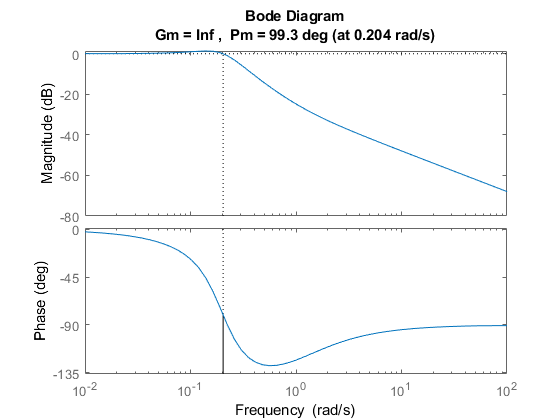

In [2]:
clear variables;
%% plant Gp 
s = tf('s');
Gp = 0.04*(s+1)/(s^2+0.2*s+0.04); % uncompensated plant

fig = figure(1); 
margin(Gp); % calculates the phase margin and gain margin at their frequencies
[Gm,Pm,Wcg,Wcp] = margin(Gp);
Gcl = feedback(Gp,1); % closed-loop of the uncompensated plant




ans = 

  struct with fields:

        RiseTime: 5.0078
    SettlingTime: 28.6751
     SettlingMin: 0.4631
     SettlingMax: 0.6201
       Overshoot: 24.0167
      Undershoot: 0
            Peak: 0.6201
        PeakTime: 11.1292




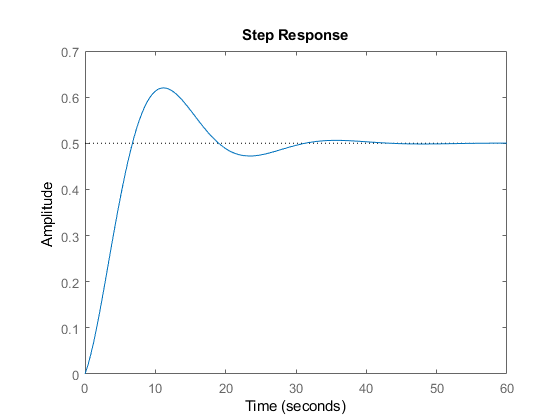

In [3]:
fig = figure(2);
step(Gcl); % step response to the closed-loop system
stepinfo(Gcl) % system performance values

The result shows that the plant is very slow with a big overshoot. A phase margin ($PM$) of $60°$ can be the unique requirement. As long as the compensated phase margin is around that value, the settling time and overshoot should be minimized as much as possible.

## Phase-Lead compensator
The selected compensator can be written as follows,
\begin{align}
G_c = K_c~\dfrac{s+z}{s+p},\quad |z|\leq|p| \tag{3}
\end{align}

### Step 1 

Calculate a gain $K$ that satisfies the desired phase margin $PM_d=60°$. Applying the angle condition for a $PM_d$ over $G_p$,
\begin{align}
\measuredangle G_p(j\omega_c^\prime) &= PM_d - 180° \tag{4} \\
\measuredangle G_p(j\omega_c^\prime) &= 60° - 180° \nonumber \\
\measuredangle G_p(j\omega_c^\prime) &= -120° \nonumber
\end{align}
where $\omega_c^\prime$ is the new crossover frequency for the desired phase margin $PM_d=60°$.

Using the bode plot of $G_p$, the logarithm gain at $-120°$ is $-8.02~dB$, so the gain $K$ can be calculated as follows,
\begin{align}
20\log_{10} K &= |-8.02| \tag{5} \\
K &= 2.52 \nonumber
\end{align}

Therefore, the uncompensated $G_p$ that satisfies the desired phase margin is,
\begin{align}
G_{p1} &= K~G_p \nonumber\\
G_{p1} &= 2.52 \dfrac{0.04(s+1)}{s^2+0.2s+0.04} \tag{6}
\end{align}

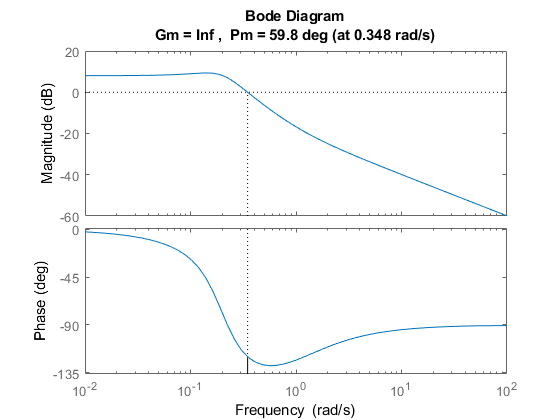

In [4]:
%% Design requirements
PO = 10; % percentage overshoot
zeta = log(100/PO)/sqrt(pi^2+ (log(100/PO))^2 ); % damping ratio
PM_d = round(100*zeta)+1; % desired PM

%% Obtaining the gain K that meets the desired PM_d
K = 10^(8.03/20); % the gain 8.03 obtained from the bode plot
Gp1 = K*Gp; % new uncompensated plant

fig = figure(11);
margin(Gp1);


The result shows that the new uncompensated plant $G_{p1}$ satisfies the desired phase margin.

### Step 2

The digital uncompensated $G_{z1}$ plant of $G_{p1}$ can be calculated using a zero-order holder with a sampling time $T_s=0.01$.
\begin{align}
G_{z1} &= 1.01 \times 10^{-3}\frac{z-0.99}{z^2-1.99z+0.99} \tag{7}
\end{align} 


ans = 

  struct with fields:

        RiseTime: 3.5100
    SettlingTime: 21.4000
     SettlingMin: 0.6452
     SettlingMax: 0.9128
       Overshoot: 27.4986
      Undershoot: 0
            Peak: 0.9128
        PeakTime: 8.0100




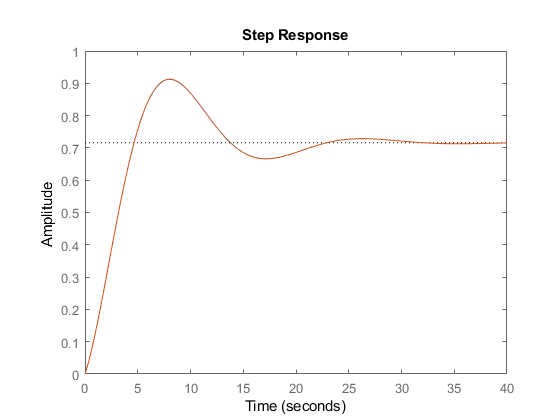

In [5]:
%% Digital uncompensated system with the new gain K
Ts = 0.01; % sampling time
Gz1 = c2d(Gp1,Ts,'zoh'); % convert the continuos time plant Gp2 to the
% discrete time domain with the zero order holder
Gp1_cl = feedback(Gp1,1); % closed-loop system in continuos time
Gz1_cl = feedback(Gz1,1); % closed-loop system in discrete time

fig = figure(3);
step(Gp1_cl,Gz1_cl); % step response of both continuos and discrete systems
stepinfo(Gz1_cl) % system performance values

It can be seen that the continuous and discrete plant are almost similar. Also, the settling time has been reduced but the steady state error is too big.

### Step 3

With the desired phase margin, the value of $\beta$ can be calculated as follows,
\begin{align}
PM_{act}- & PM_d+\theta = \arctan\dfrac{\beta-1}{2\sqrt{\beta}} \tag{8}
\end{align}
where $PM_{act}$ is the actual phase margin of the uncompensated plant $G_{p1}$, and $\theta$ is a factor of correction.

After some operations,
\begin{align}
\beta^2- & \beta\left[2+4\left(\tan(PM_d-PM_{act}+\theta)\right)\right] +1 = 0 \nonumber\\
\end{align}
if $\theta=6°$, $PM_d=60°$, and $PM_{act}=61.25°$ obtained from the Bode plot below. The $\beta$ will be,
\begin{align}
&\qquad \beta = 1.18 \nonumber
\end{align}


beta =

    1.1804
    0.8472




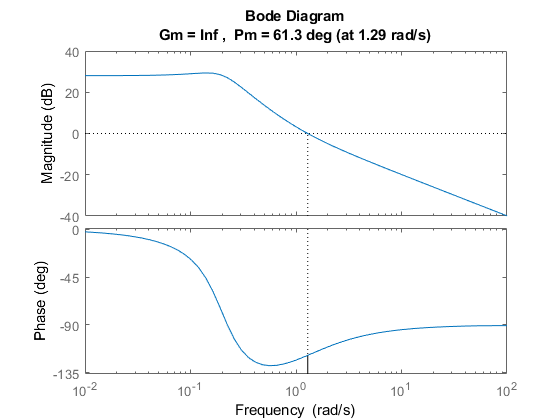

In [6]:
%% Designing the Phase-lead digital controller 
% introducing a new gain 10 times faster in order to obtain a fast
% response to the step input
Gp2 = K*10*Gp;

fig = figure(4);
margin(Gp2); % checking the desired phase margin PM_d 
[Gm1,PM_act,Wcg1,Wcp1] = margin(Gp2);

% obtaining beta with the actual PM and the desired PM
theta = 6; % correction factor
beta = roots( [1 -(2+4*( tand(PM_d-PM_act+theta) )^2) 1] )
% beta = (1+sind(PM_d-PM_act+theta))/(1-sind(PM_d-PM_act+theta));

### Step 4
Now, the  crossover over frequency $\omega_c$ needs to be calculated using the following gain condition formula,
\begin{align}
\left| G_{p1}(j\omega_c) \right| &= \dfrac{1}{\sqrt{\beta}} \tag{9}
\end{align}
if we use the peak magnitude $M_{pc}$ relation,
\begin{align}
M_{pc} &= \dfrac{1}{\sqrt{\beta}} \tag{10}
\end{align}
and using `getGainCrossover` command in Matlab,
\begin{align}
\omega_c& = 1.37 ~rad/sec \nonumber
\end{align}

In [7]:
% calculating the new crossover frequency
Mpc = 1/sqrt(beta(1)); % find compensator peak magnitude.
omega_c = getGainCrossover(Gp2,Mpc); % The new gain crossover frequency wc

### Step 5
Determining the zero of the controller,
\begin{align}
\omega_c &= \sqrt{\beta z^2} \tag{11} \\
z &= 1.26 \nonumber
\end{align}
therefore, the compensator in continuous time can be written as follows,
\begin{align}
G_c &= \beta\dfrac{s+z}{s+\beta z} \tag{12} \\
G_c &= 1.18~\dfrac{s+1.26}{s+1.49} \nonumber
\end{align}
and in discrete time,
\begin{align}
G_cz &= 1.18~\dfrac{z-0.99}{z-0.98} \nonumber
\end{align}

The open-loop compensated in continuous and discrete time are,
\begin{align}
G_{ol} &= G_c~ G_{p1} \tag{13} \\
G_{ol} &= 1.18\quad\dfrac{s+1.26}{s+1.49} \quad 2.52\quad\dfrac{0.04(s+1)}{s^2+0.2s+0.04} \tag{14} \\
G_{olz} &= 0.01\quad \dfrac{z-0.99}{z-0.98}\quad\dfrac{z-0.98}{z^2-1.99+0.99} \tag{15}
\end{align}

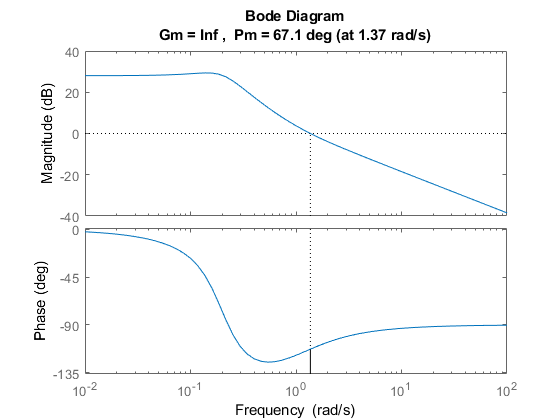

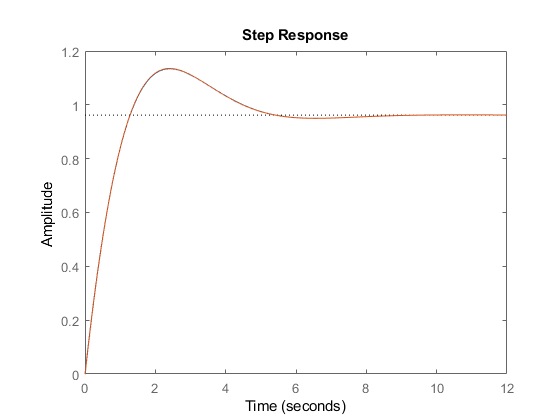

In [8]:
% determining the zero and the pole of the controller
zc = omega_c/sqrt(beta(1)); % zero of the controller
pc = beta(1)*zc; % pole of the controller

%  controller in continuous and discrete time
Gc = beta(1)*(s+zc)/(s+pc); % phase-lead controller in continuous time
Gcz = c2d(Gc,Ts,'zoh'); % phase-lead controller in discrete time

%% Evaluating the phase-lead controller
Gol = Gc*Gp2; % open-loop compensated in continuous time
Gcl = feedback(Gol,1); % closed-loop in continuous time
Gp2z = c2d(Gp2,Ts,'zoh'); % plant in discrete time
Golz = Gcz*Gp2z; % open-loop compensated in discrete time
Gclz = feedback(Golz,1); % closed-loop in discrete time

fig = figure(5);
margin(Gol);


fig = figure(6);
step(Gcl,Gclz);


The results shows that the compensated system using a Phase-Lead controller achieves with success the desired phase margin of $60°$, and has a small settling time $t_s=4.84~sec$.

# Deadbet controller

The deadbeat controller approach finds an input signal in order to bring the output to the steady-state in the smallest number of time steps. It has some characteristics:
- Zero steady-state error. 	
- Minimum rise time.
- Minimum settling time.
- Less than 2\% overshoot/undershoot.
- Very high control signal output.
- Can not be used in continuous time.

As long as the plant $G(z)$ has all zeros and poles inside the unit circle (minimum phase), the plant can be written as,
\begin{align*}
G(z) &= \dfrac{z^{d} B(z)}{A(z)} = \dfrac{z^{d}(b_o + b_1 z^{-1}+...+b_m z^{-m})}{1+a_1 z^{-1} + ... + a_n z^{-n}}, \quad d=n-m>0
\end{align*}
with an step input $r(k)$, the deadbeat response requirement implies,
\begin{align*}
	M(z) &= z^{-d}
\end{align*} 

The digital deadbeat will have the following transfer function,
\begin{align}
D(z) &= \dfrac{A(z)}{z^{-d}B(z)}~\dfrac{z^{-d}}{1-z^{-d}} \tag{16} \\
\end{align}
and the closed-loop system is,
\begin{align*}
Y(z) &= z^{-d} U(z)
\end{align*} 
which means,
\begin{align*}
y(k) &= u(k-d)
\end{align*}
So when $u(k)$ is a step input, the output will be d-step delay of the same signal.

Let's design a digital deadbeat controller for the plant,
\begin{align*}
G_p(s) &= \dfrac{0.04(s+1)}{s^2+0.2s+0.04} \\
G_p(z) &= \dfrac{5.47\times 10^{-2}(z-0.34)}{z^2 - 1.78z + 0.82}
\end{align*}
with sampling time $T_s=1$.


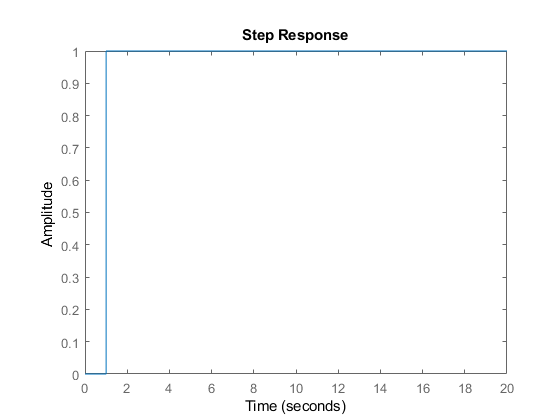

In [9]:
clear variables;
s = tf('s');
Gp = 0.04*(s+1)/(s^2+0.2*s+0.04); % uncompensated plant
Ts = 1; % sampling time
Gz = c2d(Gp,Ts,'zoh'); % System transfer function in discrete time

% Minimum phase case
z=zpk('z',Ts);
Mz = 1/z; % closed-loop because the relative order d = 1
Dz = Mz/(Gz*(1-Mz)); % deadbeat controller
Dz = minreal(Dz); % cancel common factors

fig = figure(1); 
step(Dz*Gz/(1+Dz*Gz)) % step response of closed-loop




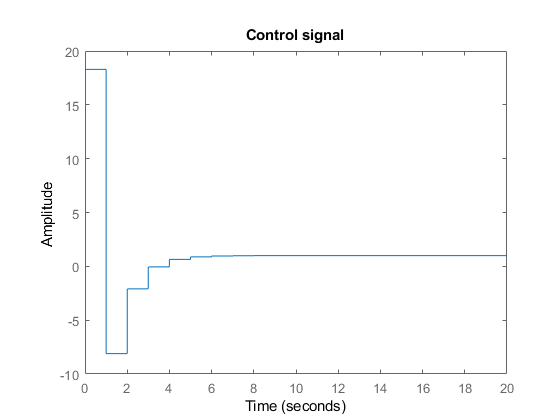

In [10]:
fig = figure(2); 
step(Dz/(1+Dz*Gz)) % control signal
title("Control signal");

The closed-loop discrete system results in,
\begin{align*}
G_{clz} &= \dfrac{(z-1) (z-0.3392)^2 (z^2 - 1.783z + 0.8187)^2} {z (z-0.3392)^2 (z-1) (z^2 - 1.783z + 0.8187)^2}
\end{align*}
where the controller is,
\begin{align*}
G_{cz} &= \dfrac{18.288 (z-1) (z-0.3392) (z^2 - 1.783z + 0.8187)^2}{z (z-0.3392)^2 (z-1) (z^2 - 1.783z + 0.8187)}
\end{align*}

The output of the deadbeat controller and the closed-loop system response to a unit step input shows clearly that the steady-state error reaches zero value at the first sampled time. In addition, the control signal is very high when the sampling time is increased.
